In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [32]:
# Carga de datos
data = pd.read_csv("procesadores.csv")

In [33]:
# Datos a DataFrame
dataset = pd.DataFrame(data)
dataset.head()

,N_de_ciclos_por_ Seg,Memoria_Mi+nima_kb,Memoria_Maxima_kb,Tamanio_Cache,Manimo_de_Canales,Maximo_Canales,Rendimiento_Relativo
0,125,256,6000,256,16,128,198
1,29,8000,32000,32,8,32,269
2,29,8000,32000,32,8,32,220
3,29,8000,32000,32,8,32,172
4,29,8000,16000,32,8,16,132


In [34]:
# Calculo de X
X = np.hstack((np.ones((data.shape[0], 1)), data.iloc[:, :-1]))

In [35]:
# Mostar dataframe
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6
0,1.0,125.0,256.0,6000.0,256.0,16.0,128.0
1,1.0,29.0,8000.0,32000.0,32.0,8.0,32.0
2,1.0,29.0,8000.0,32000.0,32.0,8.0,32.0
3,1.0,29.0,8000.0,32000.0,32.0,8.0,32.0
4,1.0,29.0,8000.0,16000.0,32.0,8.0,16.0


In [36]:
# Calculo de B (beta)
B = np.linalg.inv(X.T @ X) @ X.T @ data.iloc[:, -1]
B = pd.DataFrame(B)
B.head()

,0
0,-55.900116
1,0.048863
2,0.015294
3,0.005571
4,0.641207


In [37]:
# Y real
y = data.iloc[:, -1].values
y = pd.DataFrame(y)
y.head()

,0
0,198
1,269
2,220
3,172
4,132


In [38]:
# Calculo de Y estimada
Y_estimada = X @ B
Y_estimada = pd.DataFrame(Y_estimada)
Y_estimada.head()

,0
0,337.162199
1,311.944116
2,311.944116
3,311.944116
4,199.083730


In [39]:
# Calculo de residuos r
r = y - Y_estimada
r = pd.DataFrame(r)
r.head()

,0
0,-139.162199
1,-42.944116
2,-91.944116
3,-139.944116
4,-67.083730


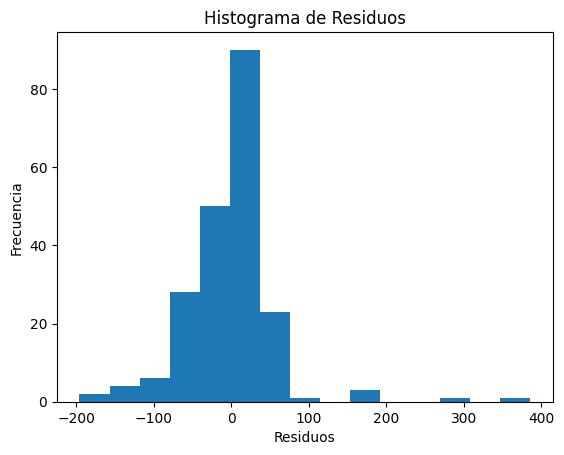

In [40]:
# Histograma de residuos
plt.hist(r.iloc[:, 0], bins=15)
plt.title('Histograma de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

In [41]:
# Calculo de la media de los residuales
# np.mean(r.iloc[:, 0])
round(np.mean(r.iloc[:, 0]), 2)

-0.0

In [42]:
# Verificar Y real
y_real = X @ B + r
y_real = pd.DataFrame(y_real)
y_real.head()

,0
0,198.0
1,269.0
2,220.0
3,172.0
4,132.0


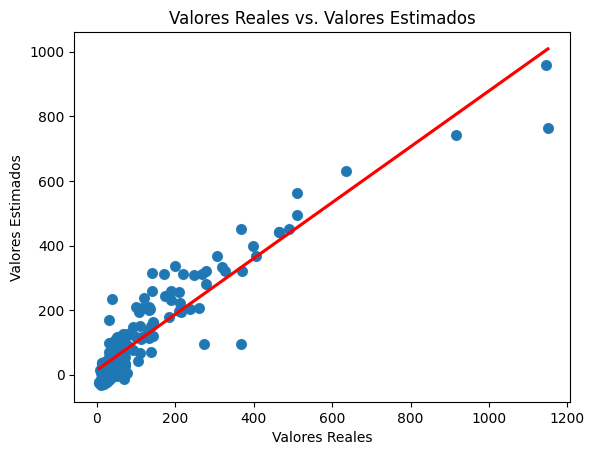

In [43]:
# Visualizar Y real vs Y estimada
sns.regplot(x=y, y=Y_estimada, scatter_kws={'s':50}, line_kws={'color':'red'}, ci=None)
plt.xlabel('Valores Reales')
plt.scatter(y, Y_estimada)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red') 
plt.xlabel('Valores Reales')
plt.ylabel('Valores Estimados')
plt.title('Valores Reales vs. Valores Estimados')
plt.show()

In [44]:
# Calculo de MSE, RMSE y R^2
MSE = mean_squared_error(y, Y_estimada)
RMSE = np.sqrt(MSE)
R2 = r2_score(y, Y_estimada)

print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')
print(f'R^2: {R2}')

MSE: 3478.4778350528773
RMSE: 58.97862184769052
R^2: 0.864875252205866


In [45]:
# Ajuste del modelo lineal con sklearn
model = LinearRegression()
model.fit(X, y)

# Coeficientes
intercept = model.intercept_
coefficients = model.coef_

In [46]:
# Convertir el intercepto y los coeficientes en dataframes
intercept = pd.DataFrame(intercept)
coefficients = pd.DataFrame(coefficients)

In [47]:
# Mostrar el intercepto
intercept.head()

,0
0,-55.900116


In [48]:
# Mostrar los coeficientes
coefficients.head()

,0,1,2,3,4,5,6
0,0.0,0.048863,0.015294,0.005571,0.641207,-0.270065,1.482694
